# Vessap Aging Dataset - 6month vs 24month old mice analysis

In [1]:
import pandas as pd
import sys
import numpy as np
import argparse
import os
import os.path as osp
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7.5]
import os
import glob
from difflib import SequenceMatcher

In [2]:
base_directory = os.getcwd()
print(f"Current working directory {base_directory}")

Current working directory /home/juli/git_repositories/vessel_statistics


In [3]:
def get_node_edge_lists(base_directory,relative_path):
    os.chdir(os.path.join(base_directory,relative_path))
    current_base_directory = os.getcwd()
    print(f"Current working directory {current_base_directory}")
    edge_list = []
    node_list = []
    for x in sorted(glob.glob('*_nodes.csv')):
        node_list.append(x)
    for x in sorted(glob.glob('*_edges.csv')):
        edge_list.append(x)
    return node_list, edge_list

In [4]:
node_list_6mo, edge_list_6mo =  get_node_edge_lists(base_directory,"csvs/BL6J-6mo/")
node_list_6mo, edge_list_6mo

Current working directory /home/juli/git_repositories/vessel_statistics/csvs/BL6J-6mo


(['BL6J-6mo-1-iso3um_probs_bin0p48_b_3_0_nodes.csv',
  'BL6J-6mo-10-iso3um_probs_bin0p49_b_3_0_nodes.csv',
  'BL6J-6mo-2-iso3um_probs_bin0p48_b_3.0_nodes.csv',
  'BL6J-6mo-3-iso3um_probs_bin0p48_b_3.0_nodes.csv',
  'BL6J-6mo-4-iso3um_probs_bin0p48_b_3.0_nodes.csv',
  'BL6J-6mo-6-iso3um_probs_bin0p49_b_3.0_nodes.csv',
  'BL6J-6mo-7-iso3um_probs_bin0p49_b_3_0_nodes.csv',
  'BL6J-6mo-8-iso3um_probs_bin0p49_b_3_0_nodes.csv',
  'BL6J-6mo-9-iso3um_probs_bin0p48_b_3.0_nodes.csv'],
 ['BL6J-6mo-1-iso3um_probs_bin0p48_b_3_0_edges.csv',
  'BL6J-6mo-10-iso3um_probs_bin0p49_b_3_0_edges.csv',
  'BL6J-6mo-2-iso3um_probs_bin0p48_b_3.0_edges.csv',
  'BL6J-6mo-3-iso3um_probs_bin0p48_b_3.0_edges.csv',
  'BL6J-6mo-4-iso3um_probs_bin0p48_b_3.0_edges.csv',
  'BL6J-6mo-6-iso3um_probs_bin0p49_b_3.0_edges.csv',
  'BL6J-6mo-7-iso3um_probs_bin0p49_b_3_0_edges.csv',
  'BL6J-6mo-8-iso3um_probs_bin0p49_b_3_0_edges.csv',
  'BL6J-6mo-9-iso3um_probs_bin0p48_b_3.0_edges.csv'])

In [5]:
node_list_24mo, edge_list_24mo =  get_node_edge_lists(base_directory,"csvs/BL6J-24mo/")
node_list_24mo, edge_list_24mo

Current working directory /home/juli/git_repositories/vessel_statistics/csvs/BL6J-24mo


(['BL6-24mo-12-iso3um_probs_bin0p48_b_3.0_nodes.csv',
  'BL6-24mo-13-iso3um_probs_bin0p48_b_3.0_nodes.csv',
  'BL6J-24mo-11_probs_bin0p48_b_3.0_nodes.csv',
  'BL6J-24mo-1_B18260-EB2_probs_bin0p48_b_3.0_nodes.csv',
  'BL6J-24mo-2_B12444-EB2_probs_bin0p48_b_3.0_nodes.csv',
  'BL6J-24mo-3_B16621.3_EB2-iso3um_probs_bin0p49_b_3.0_nodes.csv',
  'BL6J-24mo-4_B16622.2_EB2-iso3um_probs_bin0p48_b_3.0_nodes.csv',
  'BL6J-24mo-5-B18268_EB2-iso3um_probs_bin0p47_b_3.0_nodes.csv',
  'BL6J-24mo-8-iso3um_probs_bin0p46_b_3.0_nodes.csv'],
 ['BL6-24mo-12-iso3um_probs_bin0p48_b_3.0_edges.csv',
  'BL6-24mo-13-iso3um_probs_bin0p48_b_3.0_edges.csv',
  'BL6J-24mo-11_probs_bin0p48_b_3.0_edges.csv',
  'BL6J-24mo-1_B18260-EB2_probs_bin0p48_b_3.0_edges.csv',
  'BL6J-24mo-2_B12444-EB2_probs_bin0p48_b_3.0_edges.csv',
  'BL6J-24mo-3_B16621.3_EB2-iso3um_probs_bin0p49_b_3.0_edges.csv',
  'BL6J-24mo-4_B16622.2_EB2-iso3um_probs_bin0p48_b_3.0_edges.csv',
  'BL6J-24mo-5-B18268_EB2-iso3um_probs_bin0p47_b_3.0_edges.csv',
  '

In [8]:
def get_stats(node_list, edge_list, directory):
    computational_metrics = {}
    os.chdir(directory)
    for i in range(len(edge_list)):

        df_nodes = pd.read_csv(node_list[i],sep=';').abs()
        df_edges = pd.read_csv(edge_list[i],sep=';').abs()
        
        df_edges = df_edges.drop(df_edges[df_edges.curveness > 20].index)
        
        common_string = os.path.commonprefix([node_list[i],edge_list[i]]).replace("_","")

        # build a dict of

        # num_nodes
        num_nodes = len(df_nodes)

        # num_edges
        num_edges = len(df_edges)

        # node degree
        avgNodeDegree = df_nodes['degree'].mean()

        # average cross section
        avgLength = df_edges['length'].mean()
        avgDistance = df_edges['distance'].mean()
        avgCurveness = df_edges['curveness'].mean()
        avgRadius = df_edges['avgRadiusAvg'].mean()
        avgRoundnessAvg = df_edges['roundnessAvg'].mean()
        avgCrossSection = df_edges['avgCrossSection'].mean()

        computational_metrics[common_string] = {'num_nodes':num_nodes, 
                                                'num_edges':num_edges,
                                                'avgNodeDegree':avgNodeDegree,
                                                'avgLength':avgLength,
                                                'avgDistance':avgDistance,
                                                'avgCurveness':avgCurveness,
                                                'avgRadius':avgRadius,
                                                'avgRoundnessAvg':avgRoundnessAvg,
                                                'avgCrossSection':avgCrossSection}
        
    return computational_metrics


In [9]:
computational_metrics_6mo = get_stats(node_list_6mo, edge_list_6mo, os.path.join(base_directory,"csvs/BL6J-6mo/"))


In [10]:
computational_metrics_24mo = get_stats(node_list_24mo, edge_list_24mo, os.path.join(base_directory,"csvs/BL6J-24mo/"))

In [11]:
def get_elements(computational_metrics, identifier):
    values = []
    for v,k in computational_metrics.items():
        values.append(k[identifier])
    return values

In [12]:
#num_nodes = get_elements(computational_metrics_6mo, 'num_nodes')


In [13]:
#df = pd.DataFrame(num_nodes,index=computational_metrics_6mo.keys())
#df

In [14]:
computational_metrics_6mo

{'BL6J-6mo-1-iso3umprobsbin0p48b30': {'num_nodes': 3016420,
  'num_edges': 4397072,
  'avgNodeDegree': 2.926853024446198,
  'avgLength': 13.91409100729706,
  'avgDistance': 12.30614926433876,
  'avgCurveness': 1.102022027208251,
  'avgRadius': 3.6094345793056104,
  'avgRoundnessAvg': 0.4944671431652099,
  'avgCrossSection': 30.87077389696849},
 'BL6J-6mo-10-iso3umprobsbin0p49b30': {'num_nodes': 3737154,
  'num_edges': 5653751,
  'avgNodeDegree': 3.037300041689478,
  'avgLength': 12.532352416372392,
  'avgDistance': 11.240813310825367,
  'avgCurveness': 1.087162043691259,
  'avgRadius': 3.446308426858716,
  'avgRoundnessAvg': 0.5392883060029189,
  'avgCrossSection': 27.28620256101649},
 'BL6J-6mo-2-iso3umprobsbin0p48b3.0': {'num_nodes': 2836566,
  'num_edges': 4089534,
  'avgNodeDegree': 2.8953156739522368,
  'avgLength': 13.858429258961214,
  'avgDistance': 12.232265168932717,
  'avgCurveness': 1.1118170021498806,
  'avgRadius': 3.4726741292175594,
  'avgRoundnessAvg': 0.45582171242165

In [15]:
def plot_property(computational_metrics_6mo, computational_metrics_24mo,key):

    fig, ax = plt.subplots(nrows=1, ncols=2)
    
    #ax[0].set_xlabel('6 month year old mice', fontsize=10)
    #ax[1].set_xlabel('24 month year old mice', fontsize=10)
    ylabel = f"{key}"
    ax[0].set_ylabel(ylabel, fontsize=10)
    ax[1].set_ylabel(ylabel, fontsize=10)
    ax[0].plot(computational_metrics_6mo.keys(),get_elements(computational_metrics_6mo, key))
    ax[1].plot(computational_metrics_24mo.keys(),get_elements(computational_metrics_24mo, key))
    
    for label in ax[0].get_xticklabels():
        label.set_rotation(90)
        label.set_ha('right')
        
    for label in ax[1].get_xticklabels():
        label.set_rotation(90)
        label.set_ha('right')
    
    fig.suptitle(f"Comparison of {key} for 6 month / 24 month old mice", fontsize=16)

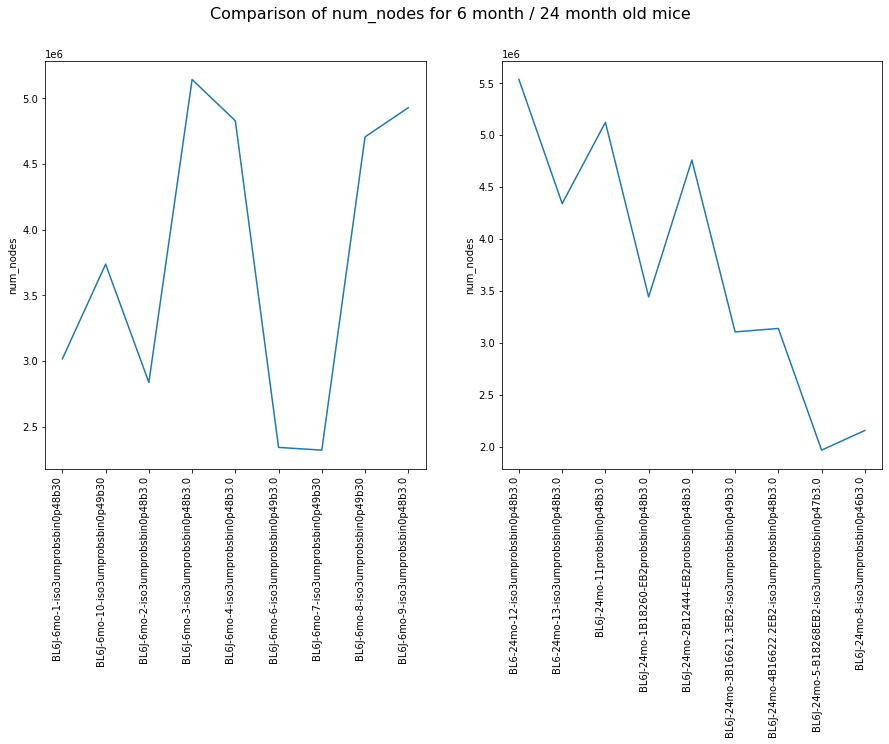

In [16]:
plot_property(computational_metrics_6mo, computational_metrics_24mo, "num_nodes")

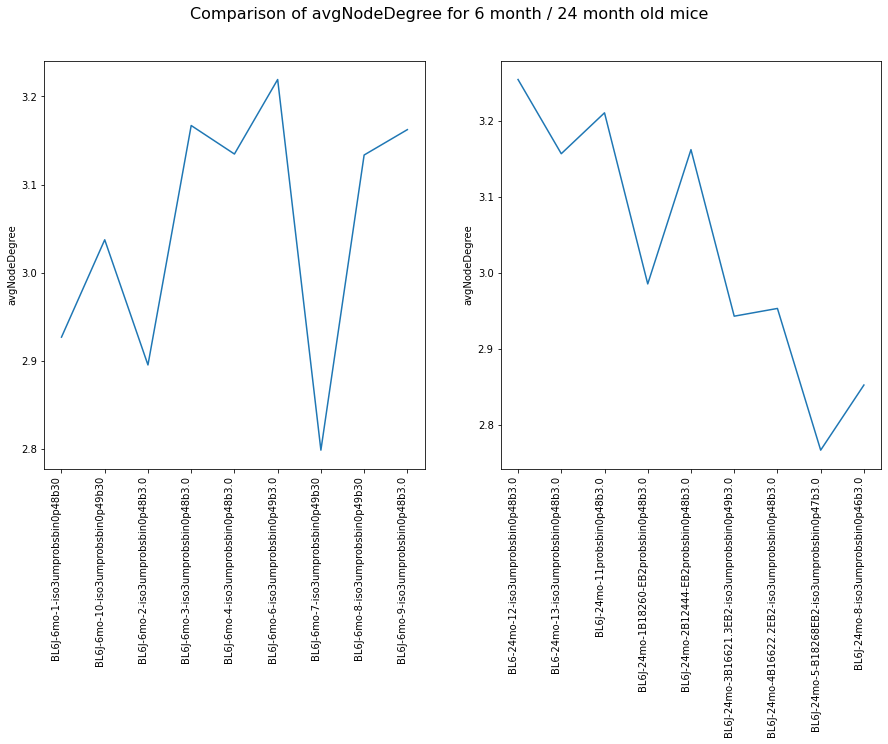

In [17]:
plot_property(computational_metrics_6mo, computational_metrics_24mo, "avgNodeDegree")

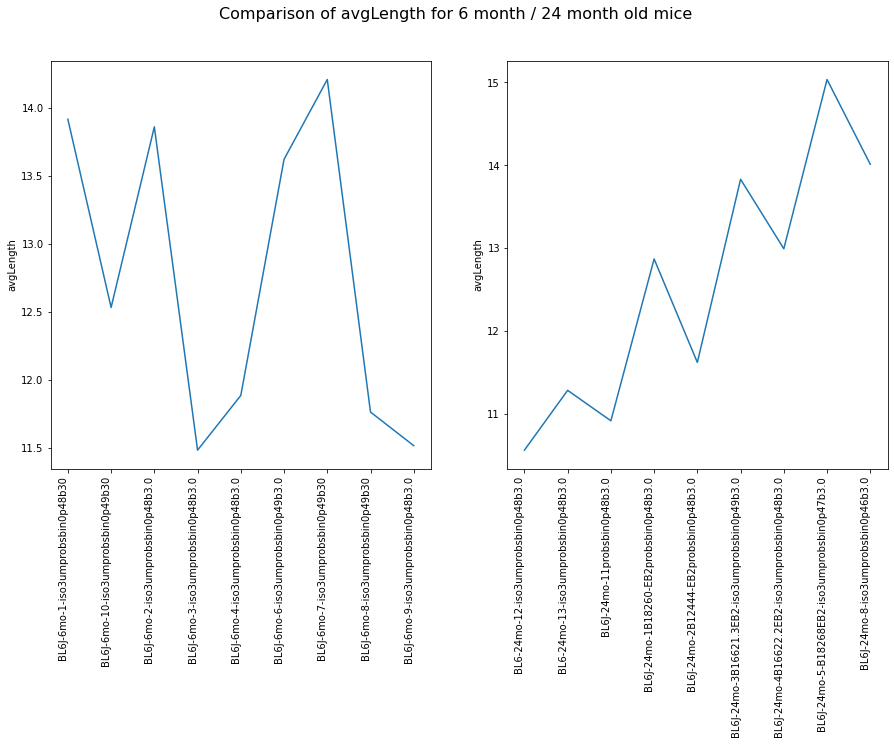

In [18]:
plot_property(computational_metrics_6mo, computational_metrics_24mo, "avgLength")

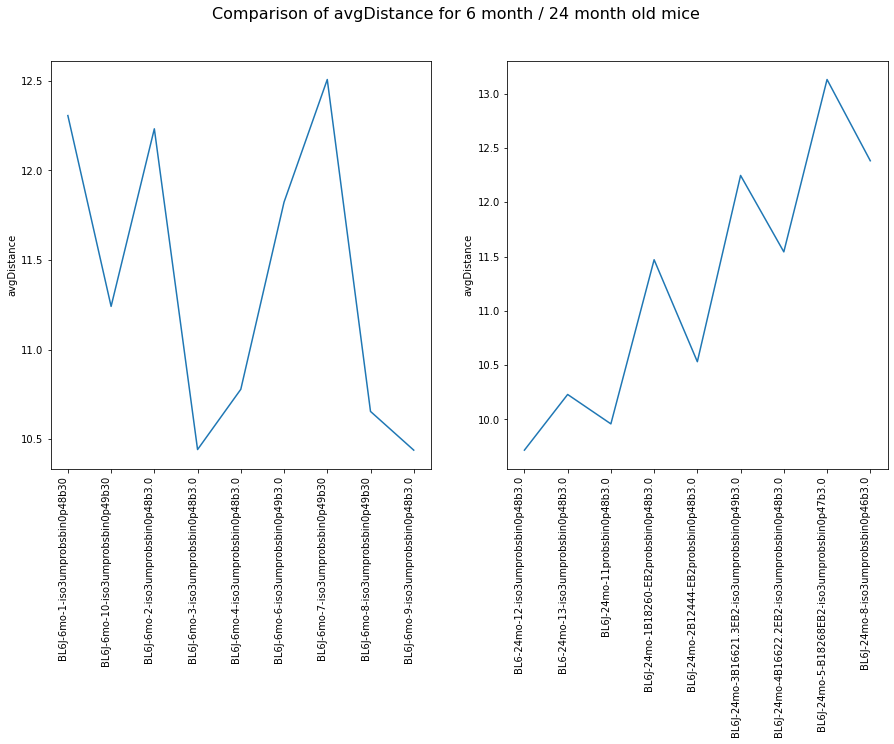

In [19]:
plot_property(computational_metrics_6mo, computational_metrics_24mo, "avgDistance")

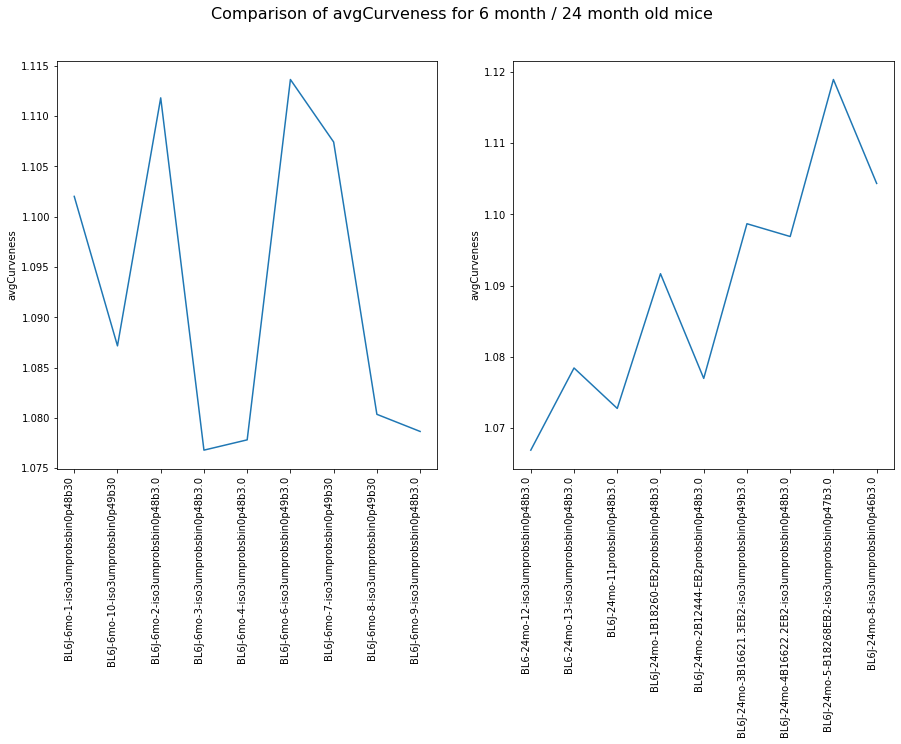

In [20]:
plot_property(computational_metrics_6mo, computational_metrics_24mo, "avgCurveness")

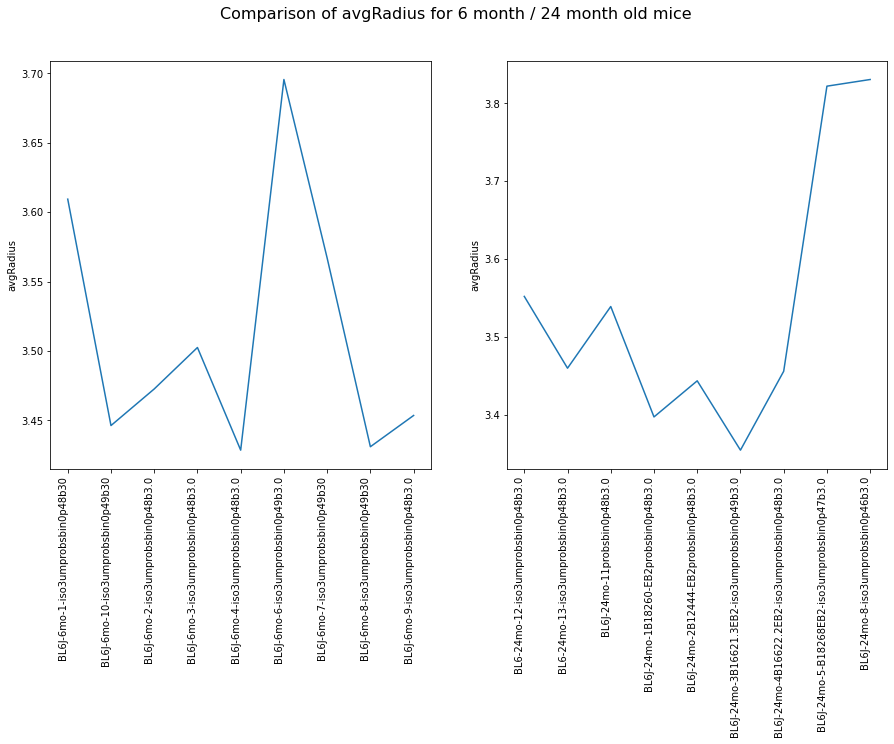

In [21]:
plot_property(computational_metrics_6mo, computational_metrics_24mo, "avgRadius")

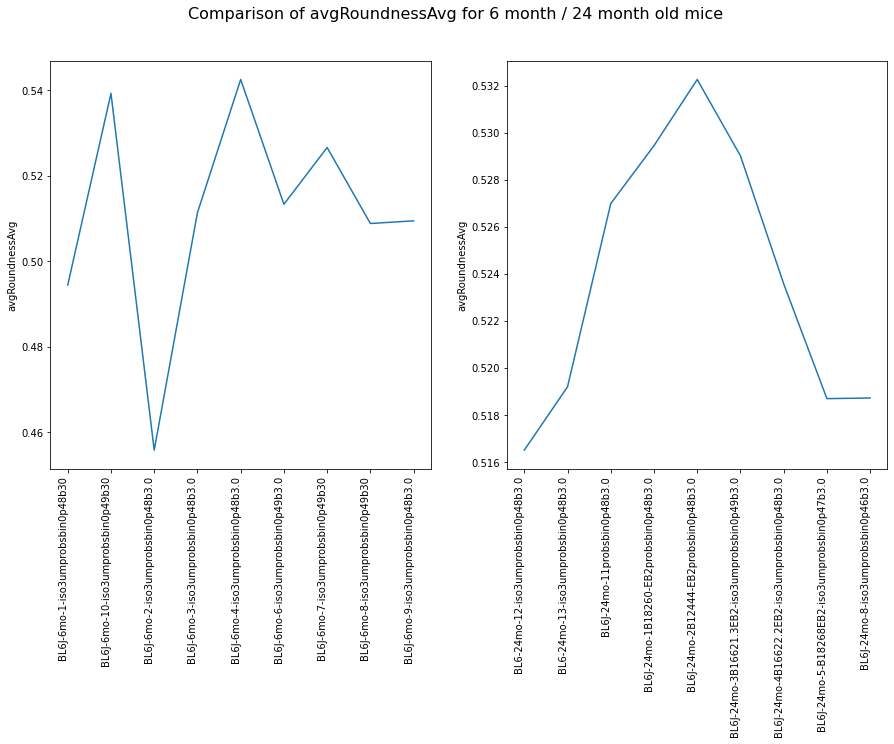

In [22]:
plot_property(computational_metrics_6mo, computational_metrics_24mo, "avgRoundnessAvg")

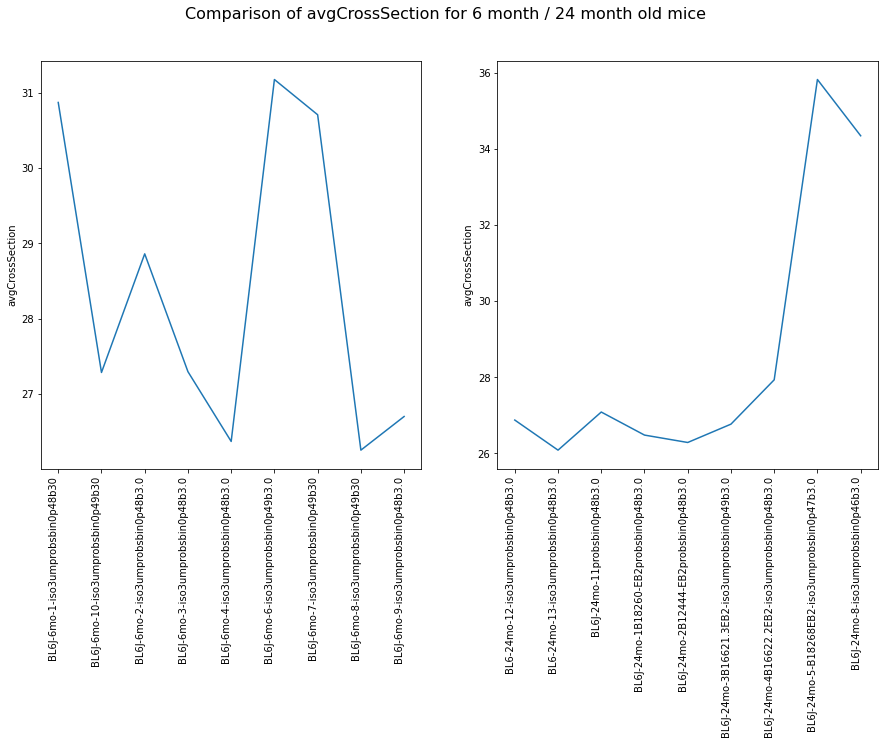

In [23]:
plot_property(computational_metrics_6mo, computational_metrics_24mo, "avgCrossSection")

# MicroVessel Detection